<a href="https://colab.research.google.com/github/AdamayB/00_P.D.F-Projects_Done_for_Fun/blob/main/cat_v_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 49.1MB/s]
100% 1.06G/1.06G [00:09<00:00, 117MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
train_data = train_datagen.flow_from_directory(directory='/content/train',
                                               target_size=(256, 256),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory='/content/test',
                                             target_size=(256, 256),
                                             class_mode='binary',
                                             batch_size=32)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [11]:
images[0].shape

(256, 256, 3)

In [12]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(256, 256, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [14]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [15]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
625/625 [==============================] - 80s 109ms/step - loss: 0.8694 - accuracy: 0.6298 - val_loss: 0.5740 - val_accuracy: 0.6988
Epoch 2/5
625/625 [==============================] - 63s 101ms/step - loss: 0.4693 - accuracy: 0.7771 - val_loss: 0.5955 - val_accuracy: 0.6906
Epoch 3/5
625/625 [==============================] - 74s 118ms/step - loss: 0.2661 - accuracy: 0.8895 - val_loss: 0.7274 - val_accuracy: 0.6936
Epoch 4/5
625/625 [==============================] - 68s 109ms/step - loss: 0.1103 - accuracy: 0.9618 - val_loss: 1.0846 - val_accuracy: 0.6786
Epoch 5/5
625/625 [==============================] - 64s 103ms/step - loss: 0.0438 - accuracy: 0.9891 - val_loss: 1.4245 - val_accuracy: 0.6880


In [16]:
tf.random.set_seed(42)
model_0 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(256, 256, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])
model_0.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_0 = model_0.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
625/625 [==============================] - 65s 102ms/step - loss: 0.6237 - accuracy: 0.6503 - val_loss: 0.5655 - val_accuracy: 0.7140
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4483 - accuracy: 0.7928 - val_loss: 0.5769 - val_accuracy: 0.7174
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1703 - accuracy: 0.9339 - val_loss: 0.7947 - val_accuracy: 0.7038
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0451 - accuracy: 0.9886 - val_loss: 1.1978 - val_accuracy: 0.7086
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0231 - accuracy: 0.9949 - val_loss: 1.3781 - val_accuracy: 0.6824
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.0221 - accuracy: 0.9942 - val_loss: 1.6829 - val_accuracy: 0.6760
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.0192 - accuracy: 0.9958 - val_loss: 1.7867 - val_acc

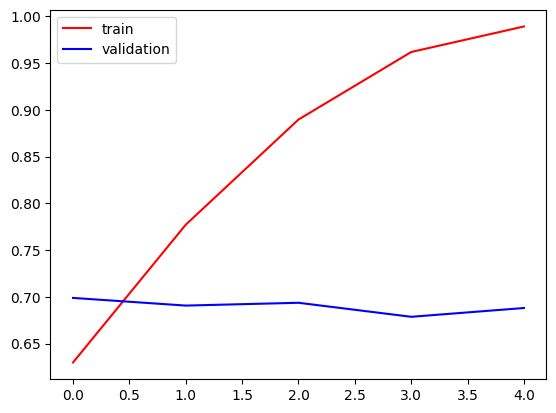

In [17]:
import matplotlib.pyplot as plt

plt.plot(history_4.history['accuracy'],color='red',label='train')
plt.plot(history_4.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

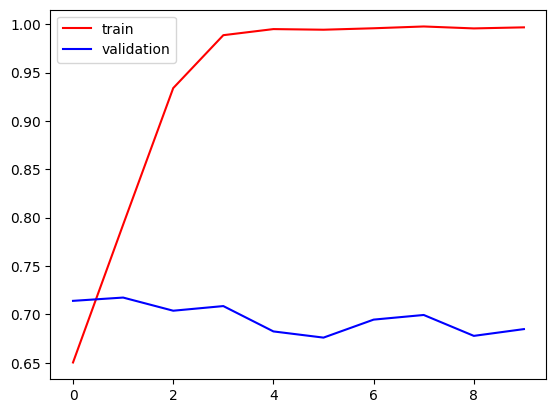

In [19]:
plt.plot(history_0.history['accuracy'],color='red',label='train')
plt.plot(history_0.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_data,epochs=10,validation_data=test_data)
#steps_per_epoch=len(train_data),
                        #validation_data=test_data,
                        #validation_steps=len(test_data)

Epoch 1/10
625/625 [==============================] - 80s 119ms/step - loss: 1.4315 - accuracy: 0.5669 - val_loss: 0.6720 - val_accuracy: 0.6320
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5863 - accuracy: 0.6888 - val_loss: 0.5735 - val_accuracy: 0.7040
Epoch 3/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4888 - accuracy: 0.7645 - val_loss: 0.5341 - val_accuracy: 0.7478
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4331 - accuracy: 0.8018 - val_loss: 0.5486 - val_accuracy: 0.7438
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3684 - accuracy: 0.8376 - val_loss: 0.4295 - val_accuracy: 0.8136
Epoch 6/10
625/625 [==============================] - 72s 116ms/step - loss: 0.3156 - accuracy: 0.8673 - val_loss: 0.5402 - val_accuracy: 0.7904
Epoch 7/10
625/625 [==============================] - 79s 127ms/step - loss: 0.2322 - accuracy: 0.9048 - val_loss: 0.5356 - val_ac

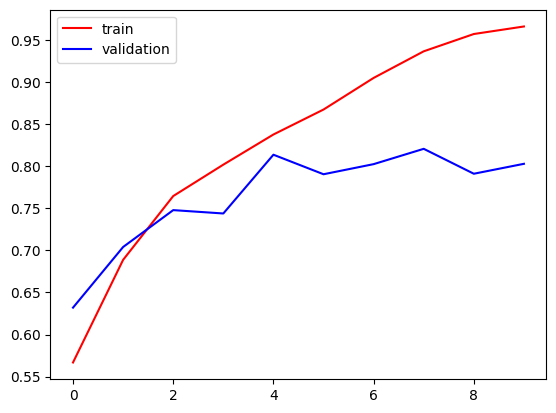

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
model_1 = Sequential()

model_1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_1.add(Flatten())

model_1.add(Dense(128,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(64,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(1,activation='sigmoid'))


model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model_1.fit(train_data,epochs=15,validation_data=test_data)

Epoch 1/15
625/625 [==============================] - 74s 113ms/step - loss: 1.0700 - accuracy: 0.5648 - val_loss: 0.6486 - val_accuracy: 0.6232
Epoch 2/15
625/625 [==============================] - 70s 112ms/step - loss: 0.6025 - accuracy: 0.6675 - val_loss: 0.5805 - val_accuracy: 0.7018
Epoch 3/15
625/625 [==============================] - 79s 126ms/step - loss: 0.5373 - accuracy: 0.7352 - val_loss: 0.5773 - val_accuracy: 0.6902
Epoch 4/15
625/625 [==============================] - 72s 115ms/step - loss: 0.4584 - accuracy: 0.7852 - val_loss: 0.4797 - val_accuracy: 0.7616
Epoch 5/15
625/625 [==============================] - 70s 112ms/step - loss: 0.3910 - accuracy: 0.8280 - val_loss: 0.4189 - val_accuracy: 0.8144
Epoch 6/15
625/625 [==============================] - 70s 113ms/step - loss: 0.3250 - accuracy: 0.8604 - val_loss: 0.4693 - val_accuracy: 0.7860
Epoch 7/15
625/625 [==============================] - 70s 111ms/step - loss: 0.2366 - accuracy: 0.9060 - val_loss: 0.5695 - val_ac

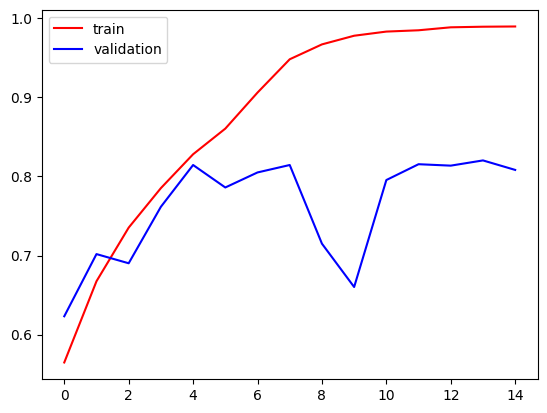

In [26]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
model_2 = Sequential()

model_2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Flatten())

model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1,activation='sigmoid'))


model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history_2 = model_2.fit(train_data,epochs=20,validation_data=test_data)

Epoch 1/20
625/625 [==============================] - 74s 113ms/step - loss: 0.9919 - accuracy: 0.5859 - val_loss: 0.6135 - val_accuracy: 0.6638
Epoch 2/20
625/625 [==============================] - 70s 112ms/step - loss: 0.5611 - accuracy: 0.7092 - val_loss: 0.5312 - val_accuracy: 0.7292
Epoch 3/20
625/625 [==============================] - 70s 112ms/step - loss: 0.4767 - accuracy: 0.7752 - val_loss: 0.5426 - val_accuracy: 0.7174
Epoch 4/20
625/625 [==============================] - 71s 113ms/step - loss: 0.4104 - accuracy: 0.8179 - val_loss: 0.6972 - val_accuracy: 0.6764
Epoch 5/20
625/625 [==============================] - 70s 111ms/step - loss: 0.3321 - accuracy: 0.8584 - val_loss: 0.4583 - val_accuracy: 0.8014
Epoch 6/20
625/625 [==============================] - 70s 113ms/step - loss: 0.2431 - accuracy: 0.9021 - val_loss: 0.5817 - val_accuracy: 0.7622
Epoch 7/20
625/625 [==============================] - 72s 115ms/step - loss: 0.1481 - accuracy: 0.9427 - val_loss: 0.5063 - val_ac

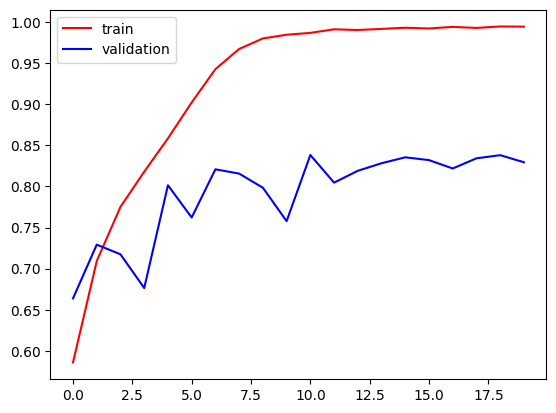

In [29]:
plt.plot(history_2.history['accuracy'],color='red',label='train')
plt.plot(history_2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

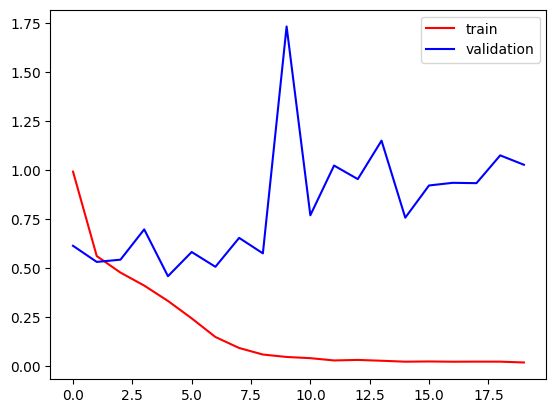

In [30]:
plt.plot(history_2.history['loss'],color='red',label='train')
plt.plot(history_2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [31]:
import cv2

In [168]:
test_img = cv2.imread('/content/gato2.jpeg')

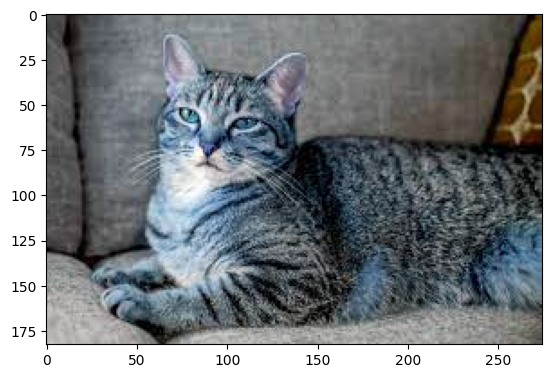

In [169]:
plt.imshow(test_img)

In [157]:
test_img.shape

(675, 1200, 3)

In [170]:
test_img = cv2.resize(test_img,(256,256))

In [171]:
test_input = test_img.reshape((1,256,256,3))

In [175]:
res=model_2.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [176]:
des={0:'Gato',1:'Perro'}
print(des[int(res)])

Gato


# ```model_2``` Gives the best results till now.

!pip install session-info

In [178]:
import session_info
session_info.show()

In [180]:
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt